In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.drop(columns=["User ID","Gender"])

In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [5]:
x=df.drop(columns=["Purchased"])
y=df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Feature Scaling**

In [6]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(RandomForestClassifier(random_state=0),{"n_estimators":[3,4,5,6,8,10,20,30,40,50]},cv=10)

In [8]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [3, 4, 5, 6, 8, 10, 20, 30, 40, 50]})

In [9]:
grid.cv_results_

{'mean_fit_time': array([0.00658967, 0.00743577, 0.00938404, 0.00979636, 0.01445158,
        0.01576264, 0.02977002, 0.04319932, 0.06169534, 0.07310078]),
 'std_fit_time': array([0.00206091, 0.00130785, 0.00167878, 0.0002297 , 0.00299109,
        0.00037383, 0.00225297, 0.00265235, 0.00402042, 0.00568648]),
 'mean_score_time': array([0.00121326, 0.00135217, 0.00139804, 0.00149021, 0.00191336,
        0.00193434, 0.00258048, 0.00352407, 0.00478294, 0.00559776]),
 'std_score_time': array([1.33817142e-04, 2.82440338e-04, 7.76365579e-05, 6.03736103e-05,
        3.81964256e-04, 1.87497979e-04, 1.17361097e-04, 3.56201522e-04,
        7.52276400e-04, 3.88610378e-04]),
 'param_n_estimators': masked_array(data=[3, 4, 5, 6, 8, 10, 20, 30, 40, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 4},
  {'n_estimators': 5},
  {'n_esti

**Predicting the Test set results**

In [10]:
grid.best_score_

0.892857142857143

In [11]:
grid.best_params_


{'n_estimators': 40}

In [12]:
model = RandomForestClassifier(random_state=0,n_estimators=50)

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [14]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [15]:
model.score(X_test, y_test)

0.9083333333333333

**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_y_pred = model.predict(X_train)
am = confusion_matrix(y_train, train_y_pred)
print(cm)
print(am)

[[72  3]
 [ 8 37]]
[[181   1]
 [  0  98]]


**Visualising the Training set results**

Text(42.0, 0.5, 'Truth')

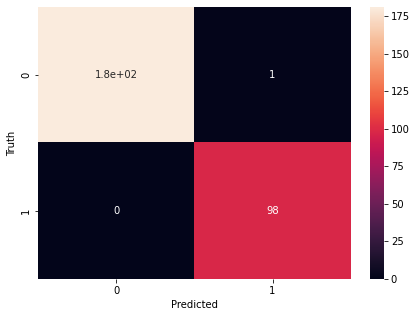

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(am, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(42.0, 0.5, 'Truth')

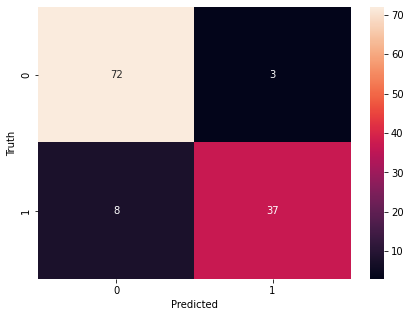

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')